## Librerias

In [145]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [2]:
ran =62

In [3]:
df = pd.read_feather('../data/preprocessed_data.feather')

In [78]:
f_df =df.copy()
total_columns = list(f_df.columns)
columns_to_delete = ['total_area','stratum', 'rooms', 'bathrooms','age', 'fixed_price','id', 'neighbourhood']
total_amenities = [i for i in total_columns if i not in columns_to_delete]    
f_df['total_amenities'] = f_df[total_amenities].sum(axis=1)
f_df

id           neighbourhood   fixed_price  stratum  bathrooms  \
0    10067017                castilla  6.100000e+08      3.0        3.0   
1    10067623       villas de granada  3.200000e+08      3.0        3.0   
2    10068447          cerros de niza  1.190000e+09      6.0        4.0   
3    10072113         prado veraniego  5.850000e+08      3.0        2.0   
4    10076538  santa barbara oriental  1.400000e+09      5.0        3.0   
..        ...                     ...           ...      ...        ...   
972   8220546               chapinero  4.200000e+09      4.0        4.0   
973   8239680     jose joaquin vargas  9.000000e+08      5.0        3.0   
974   8242169              cedro golf  6.800000e+08      4.0        3.0   
975   8244353                 palermo  7.290000e+08      3.0        3.0   
976   8297035               hipotecho  8.950000e+08      3.0        4.0   

         age  rooms  Acceso Pavimentado  Aire Acondicionado  Alarma  ...  \
0       > 30    4.0                   0                   0       0  ...   
1     9 - 15    4.0                   0                   0       0  ...   
2     9 - 15    3.0                   0                   0       0  ...   
3       > 30    3.0                   0                   0       0  ...   
4    16 - 30    7.0                   0                   0       0  ...   
..       ...    ...                 ...                 ...     ...  ...   
972     > 30    6.0                   1                   0       0  ...   
973  16 - 30    3.0                   0                   0       0  ...   
974  16 - 30    5.0                   0                   0       0  ...   
975     > 30    5.0                   0                   0       0  ...   
976     > 30    4.0                   1                   0       0  ...   

     Zona Infantil  Zona Residencial  Zona de BBQ  Zona de Camping  \
0                0                 1            0                0   
1                0                 1            0                0   
2                1                 1            0                0   
3                0                 1            0                0   
4                0                 1            0                0   
..             ...               ...          ...              ...   
972              0                 0            0                0   
973              0                 1            0                0   
974              0                 1            0                0   
975              0                 1            0                0   
976              0                 1            0                0   

     Zona de lavandería  Zonas Verdes  Árboles frutales  Área Urbana  \
0                     1             1                 0            0   
1                     1             1                 0            0   
2                     1             1                 0            0   
3                     0             0                 0            0   
4                     0             0                 0            0   
..                  ...           ...               ...          ...   
972                   0             0                 0            0   
973                   1             0                 0            1   
974                   1             0                 0            0   
975                   1             0                 0            1   
976                   0             0                 0            0   

     total_area  total_amenities  
0         181.0               18  
1         120.0               21  
2         263.0               31  
3         120.0                6  
4         248.0                9  
..          ...              ...  
972       580.0               11  
973       116.0               39  
974       150.0                8  
975       255.0               21  
976       300.0               17  

[977 rows x 163 columns]

In [4]:
df_model = df.copy()

In [5]:
df_model = df_model.drop(['id', 'neighbourhood'], axis=1)

In [6]:
df_model.head()

fixed_price  stratum  bathrooms      age  rooms  Acceso Pavimentado  \
0  6.100000e+08      3.0        3.0     > 30    4.0                   0   
1  3.200000e+08      3.0        3.0   9 - 15    4.0                   0   
2  1.190000e+09      6.0        4.0   9 - 15    3.0                   0   
3  5.850000e+08      3.0        2.0     > 30    3.0                   0   
4  1.400000e+09      5.0        3.0  16 - 30    7.0                   0   

   Aire Acondicionado  Alarma  Alarma Contra Incendio  Alcantarillado  ...  \
0                   0       0                       0               0  ...   
1                   0       0                       0               0  ...   
2                   0       0                       0               0  ...   
3                   0       0                       0               0  ...   
4                   0       0                       0               0  ...   

   Zona Industrial  Zona Infantil  Zona Residencial  Zona de BBQ  \
0                0              0                 1            0   
1                0              0                 1            0   
2                0              1                 1            0   
3                0              0                 1            0   
4                0              0                 1            0   

   Zona de Camping  Zona de lavandería  Zonas Verdes  Árboles frutales  \
0                0                   1             1                 0   
1                0                   1             1                 0   
2                0                   1             1                 0   
3                0                   0             0                 0   
4                0                   0             0                 0   

   Área Urbana  total_area  
0            0       181.0  
1            0       120.0  
2            0       263.0  
3            0       120.0  
4            0       248.0  

[5 rows x 160 columns]

In [7]:
temp_dict_age = {
    '< 1'       : 1,
    '1 - 8'     : 2,
    '9 - 15'    : 3, 
    '16 - 30'   : 4, 
    '> 30'      : 5, 
    'ND'        : 0,    
}

In [8]:
df_model['age'] = df_model['age'].map(temp_dict_age)

In [9]:
df_model['fixed_price'].sort_values(ascending=False)

169    3.300000e+11
875    2.656000e+11
156    1.300000e+10
769    1.200000e+10
866    8.500000e+09
           ...     
225    1.380000e+08
430    1.380000e+08
486    1.290000e+08
919    1.200000e+08
674    1.130000e+08
Name: fixed_price, Length: 977, dtype: float64

## Datasets

MODIFICACIONES A LOS DATOS
- Escalado de los datos
- Remover caracteristicas
- Escalado del target
- Separacion de las variables estrato, age en variables dummies
- Análisis de anomalias

In [10]:
df_model['fixed_price'] = df_model['fixed_price']/1000000 # Precios en cientos de millones de pesos
df_model['fixed_price'].sort_values(ascending=False)

169    330000.0
875    265600.0
156     13000.0
769     12000.0
866      8500.0
         ...   
225       138.0
430       138.0
486       129.0
919       120.0
674       113.0
Name: fixed_price, Length: 977, dtype: float64

- Existen datos demasiado grandes para el precio de una vivienda teniendo en cuenta los precios de las otras viviendas. Al analizar dicha vivienda sus caracteristicas son bastante regulares por lo que se cree puede ser un error y se filtran.

#### Restricción de precios

Analisis de anomalias sobre las casa con precios muy altos y que no representan el conjunto de datos completamente

In [11]:
df_model = df_model[df_model['fixed_price'] <= 2000] #6000

#### Separación del dataframe

In [12]:
def features_target_split(df):
    features = df.drop('fixed_price', axis=1)
    target = df['fixed_price']
    return features, target

In [13]:
df_train, df_pass = train_test_split(df_model, test_size=0.3, random_state=ran)
df_valid, df_test = train_test_split(df_pass, test_size=0.5, random_state=ran)

#### Isolation Forest

In [14]:
features_isolation_array = ['stratum',	'bathrooms','age','rooms', 'total_area']
features_isolation_train = df_train.copy()[features_isolation_array]
clf_forest = IsolationForest(max_samples=100, 
                             max_features=0.9,
                             n_estimators=50,
                             contamination=0.1, # funciona 0.05
                             random_state=ran)
clf_forest.fit(features_isolation_train)

IsolationForest(contamination=0.1, max_features=0.9, max_samples=100,
                n_estimators=50, random_state=62)

In [15]:
def scatterplot_one(df):
    plt.figure(figsize=(15,6))
    sns.scatterplot(df,  
                    x='total_area',
                    y='fixed_price',
                    hue='is_anomaly', 
                    # size='rooms',
                    palette="deep"
                    )
    plt.show()
def pairplot_one(df):
    sns.pairplot(df[['fixed_price','stratum',	'bathrooms','age','rooms', 'total_area', 'is_anomaly']], hue='is_anomaly', palette='magma')
    plt.show()

In [16]:

def anomalies_transformation(df, classificator, has_print=False):
    df_new = df.copy()
    anomalies_detected = classificator.predict(df_new[features_isolation_array])
    df_new['is_anomaly'] = anomalies_detected
    df_new['is_anomaly'] = df_new['is_anomaly'].apply(lambda x: 0 if x == 1 else 1)
    
    print('Total anomalies:' , len(df_new.query('is_anomaly == 1')))
    
    if has_print:
        scatterplot_one(df_new)
        pairplot_one(df_new)
    
    return df_new.query('is_anomaly == 0').drop('is_anomaly', axis=1)

Total anomalies: 13
Total anomalies: 20
Total anomalies: 62


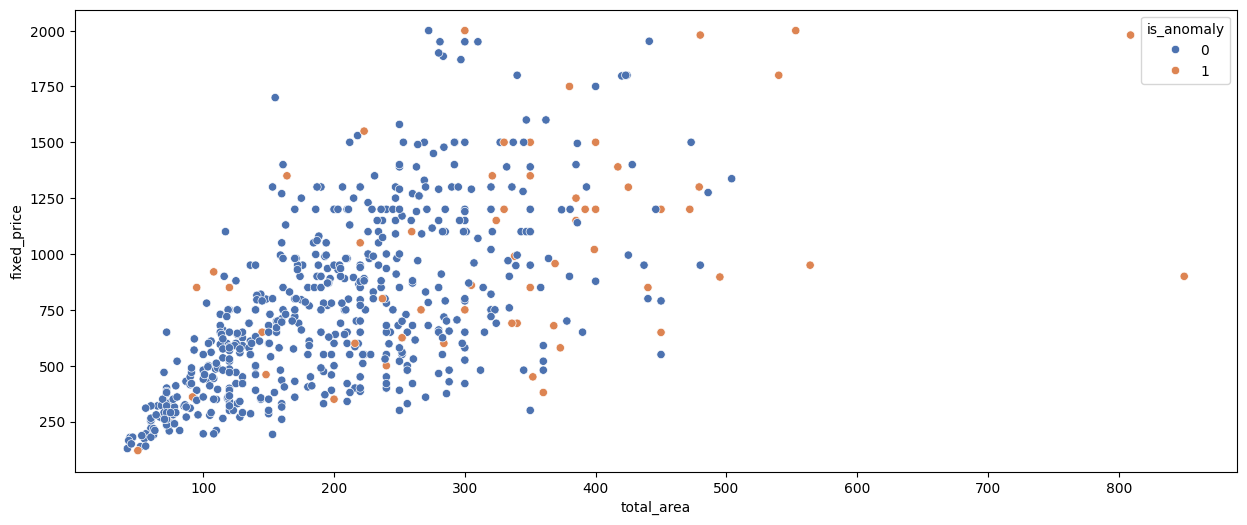

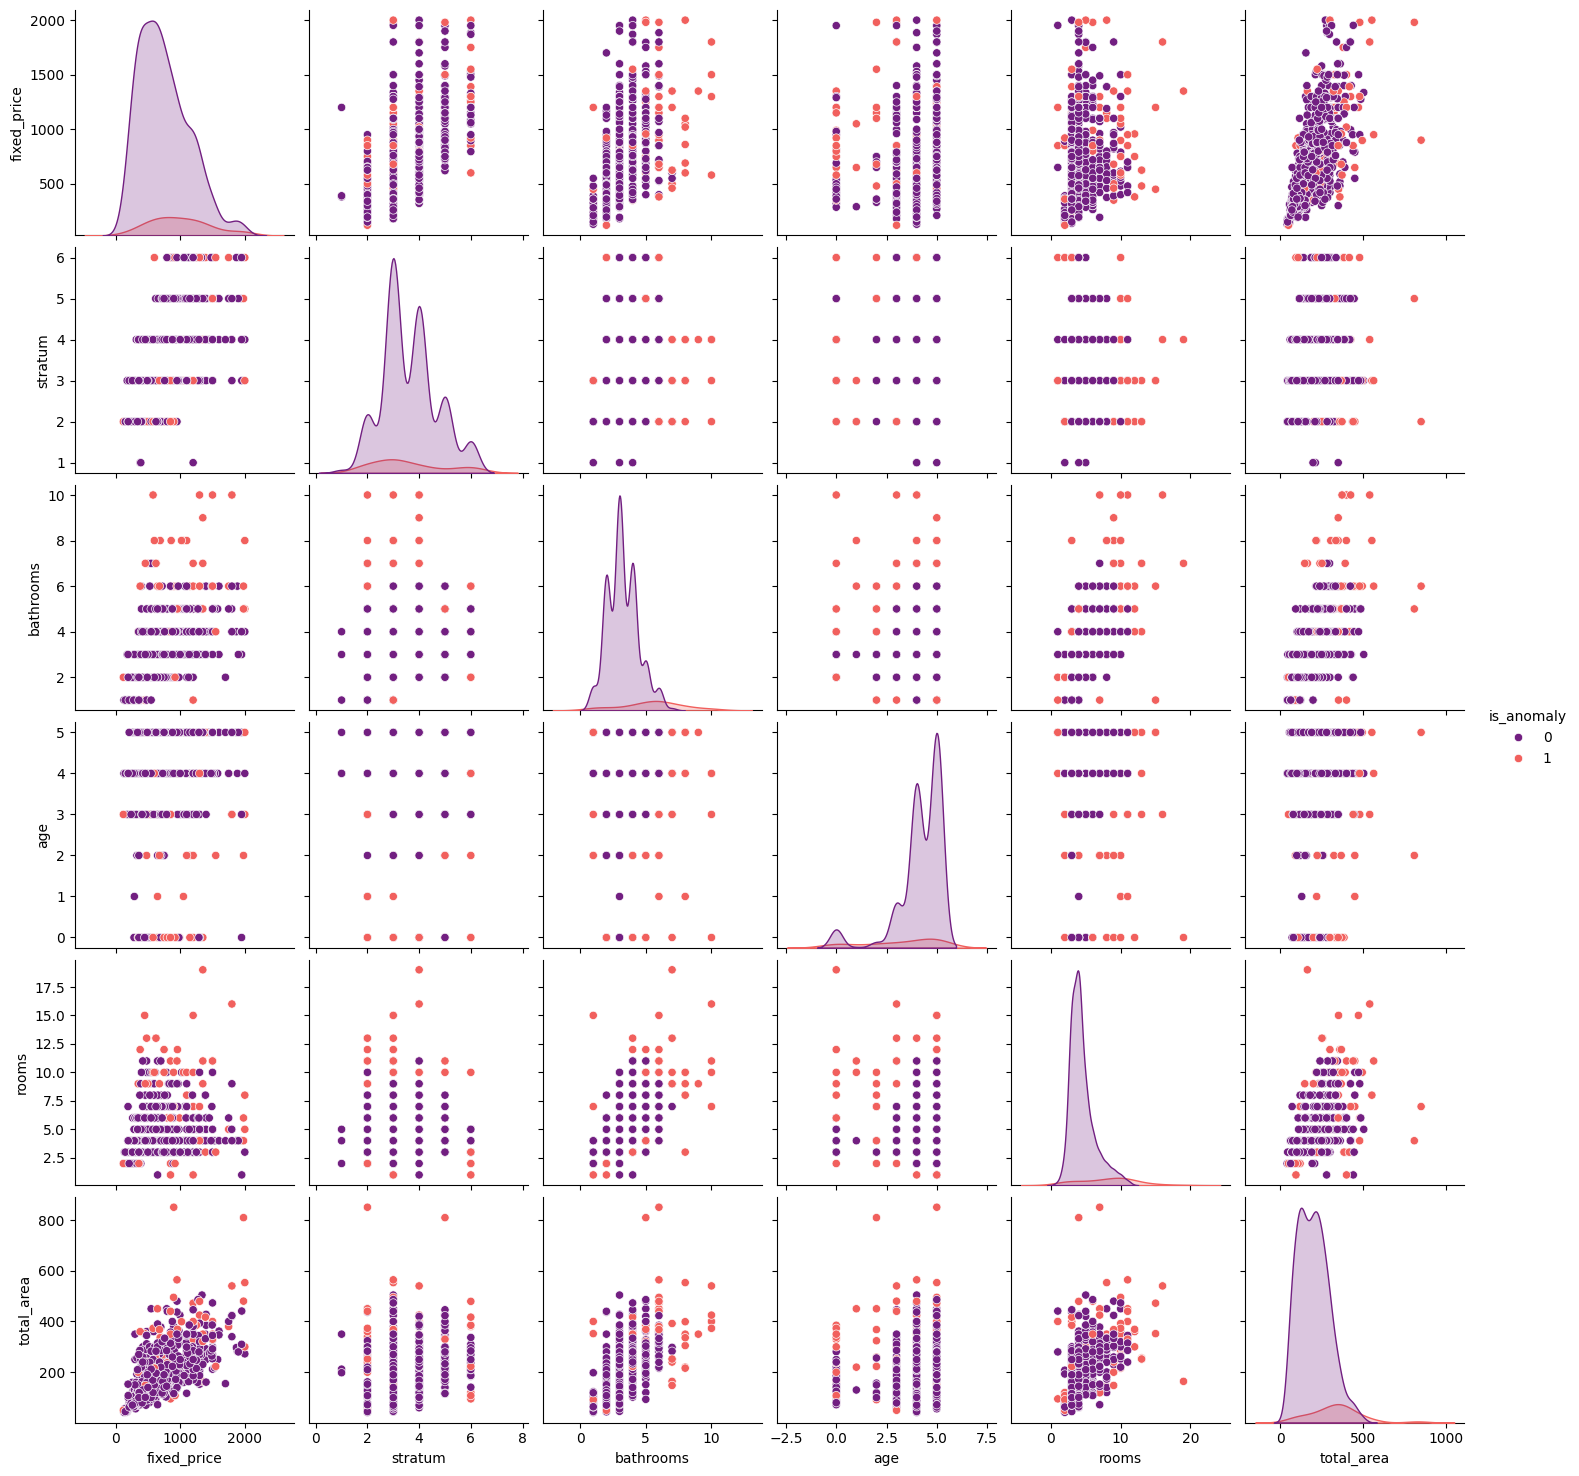

In [17]:
df_valid_isolation = anomalies_transformation(df_valid, clf_forest)
df_test_isolation = anomalies_transformation(df_test, clf_forest)
df_train_isolation = anomalies_transformation(df_train, clf_forest, True)

- Se aislan los datos basados en el isolation forest que se consideran atipicos por sus características. 
- Los datos con precion fijo mayor a 6000 también se aislan puesto que visiblemente estan alejados de los datos principales.

#### DBSCAN clustering

In [18]:
clustering = DBSCAN(eps=7,
                    min_samples=13,
                    # random_state=ran
                    )
clustering.fit_predict(features_isolation_train)
df_cluster = df_train.copy()
predictions = clustering.labels_
df_cluster['is_anomaly'] = predictions

In [19]:
df_cluster['is_anomaly'].value_counts()

is_anomaly
 0    510
-1     65
 2     29
 1     16
Name: count, dtype: int64

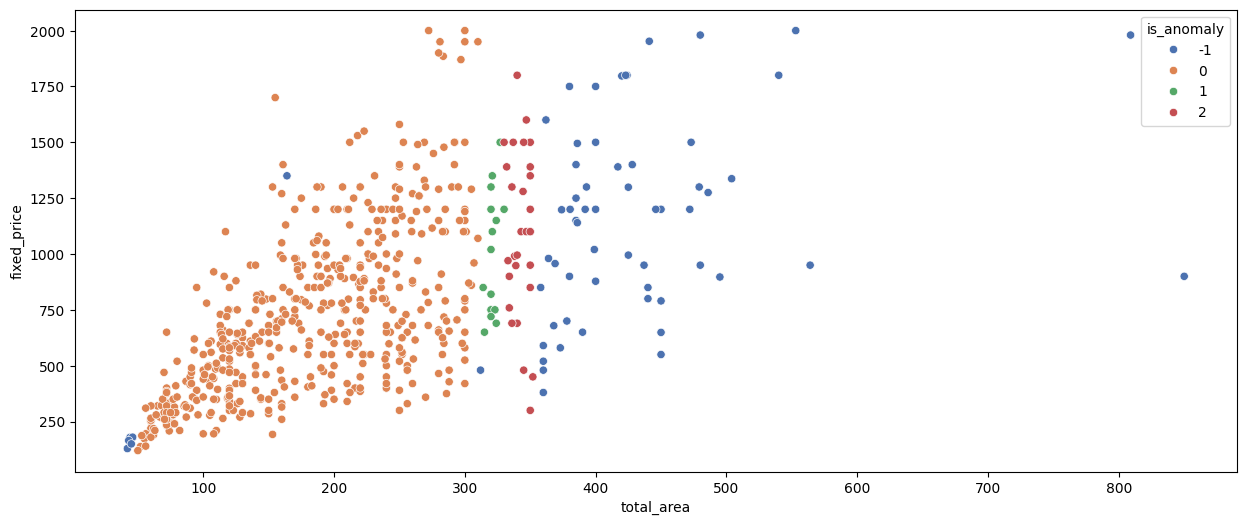

In [20]:
scatterplot_one(df_cluster)

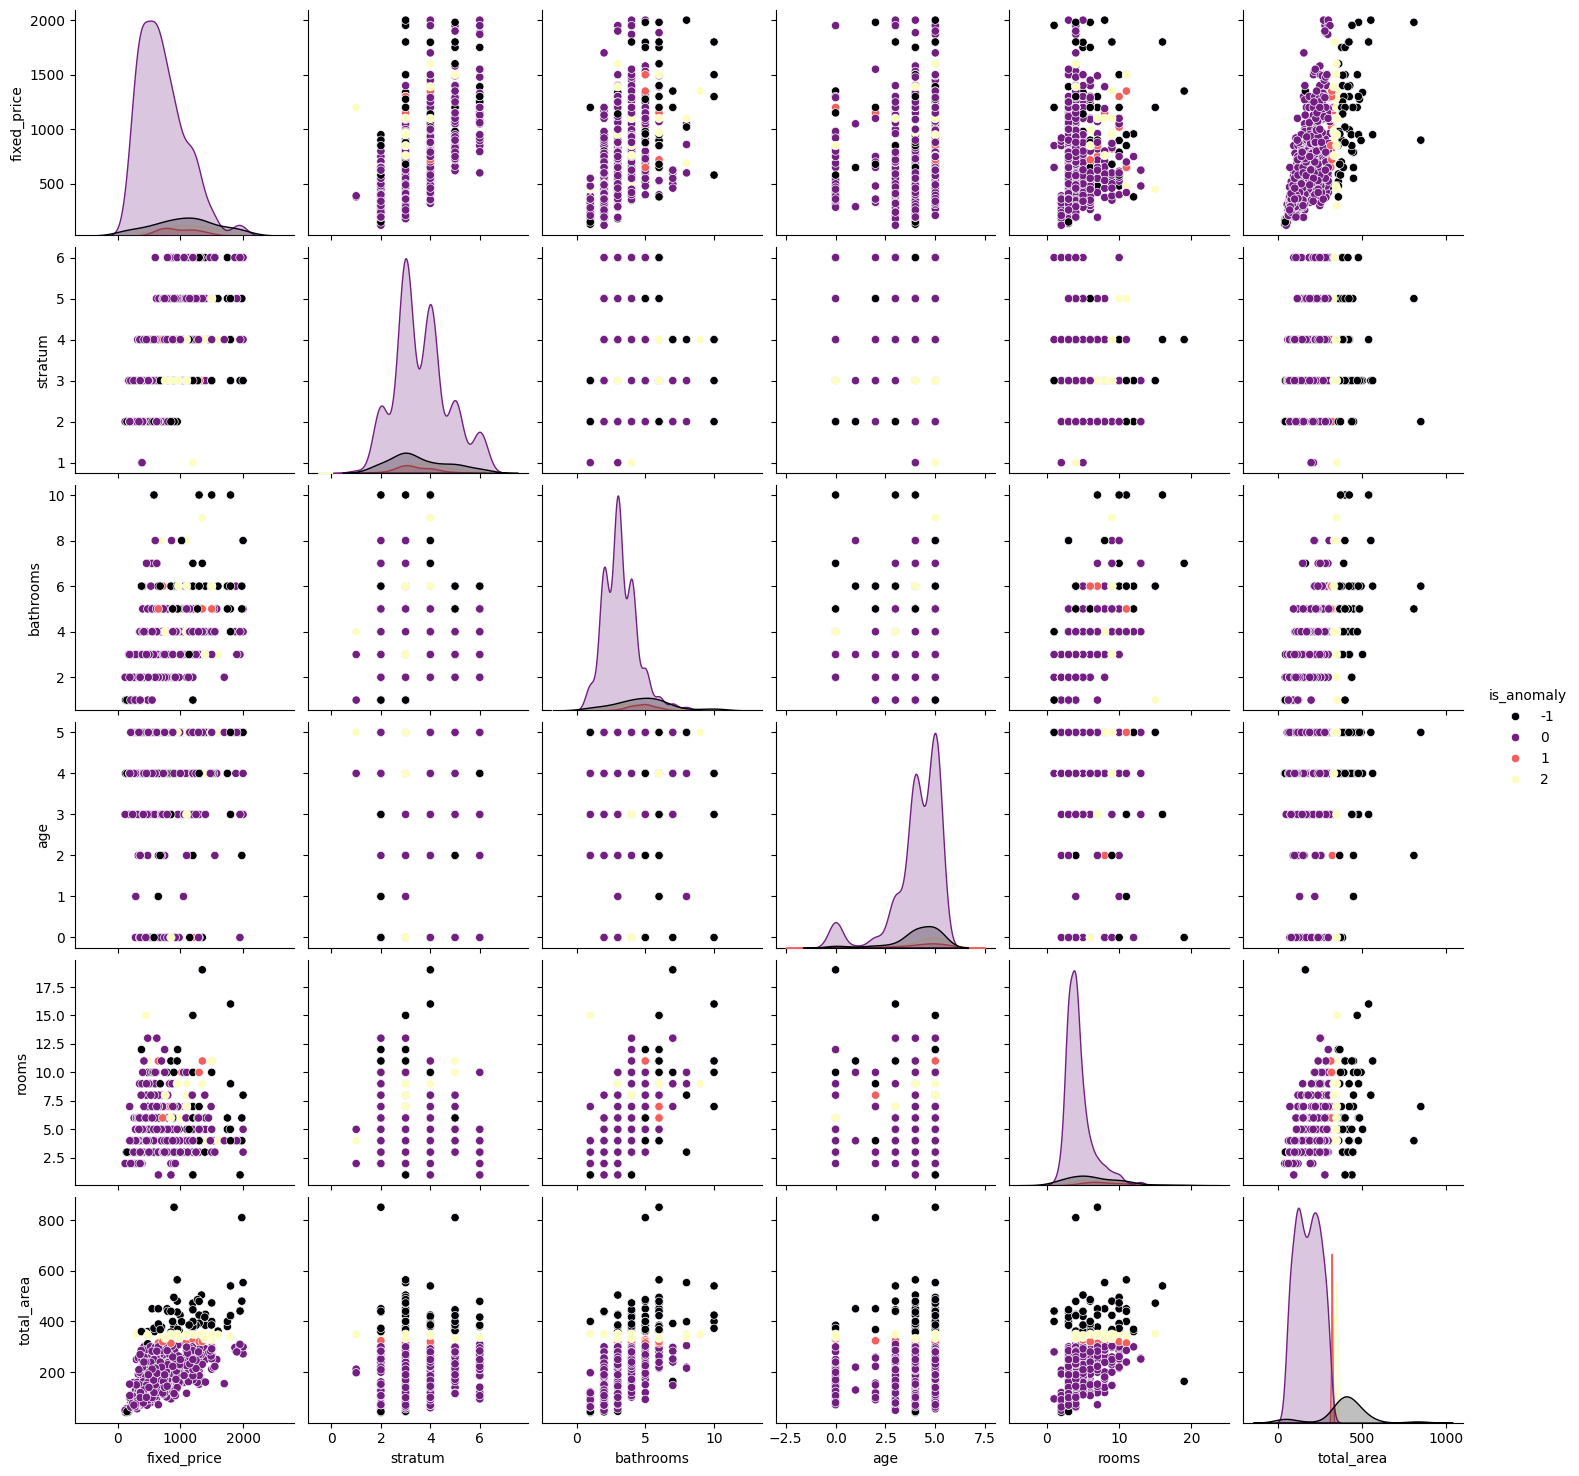

In [21]:
pairplot_one(df_cluster)

- Basado en los cortes observados por el metodo de clustering se decide realizar un datasetet que se adapte solo a las áreas menores a 400m2

In [22]:
df_train_cluster = df_train.copy()
df_train_cluster = df_train_cluster.query('total_area <= 400')
df_valid_cluster = df_valid.copy().query('total_area<=400')

#### Local Outlier Factor

In [23]:
clf_lof = LocalOutlierFactor(n_neighbors=5,
                             algorithm='kd_tree',
                            #  leaf_size=2
                            contamination=0.1
                             )

In [24]:
predict_lof = clf_lof.fit_predict(features_isolation_train)
df_lof = df_train.copy()
df_lof['is_anomaly'] = predict_lof

In [25]:
df_lof['is_anomaly'].value_counts()

is_anomaly
 1    559
-1     61
Name: count, dtype: int64

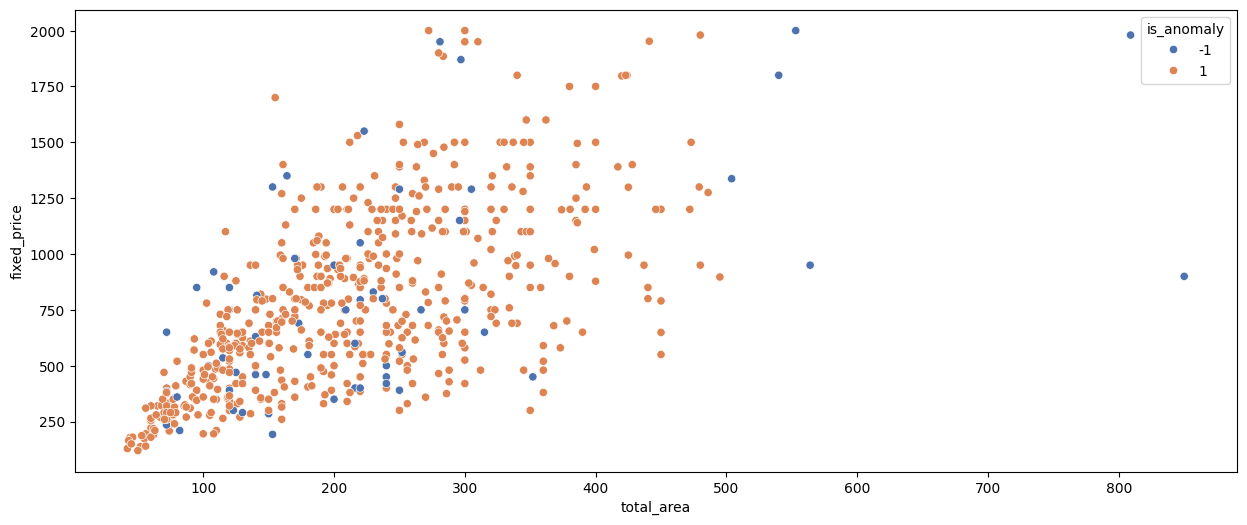

In [26]:
scatterplot_one(df_lof)

#### Escalado de variables

In [27]:
scaler = RobustScaler()
# Escalar todo
scaler.fit(df_train.drop('fixed_price', axis=1))   
df_train_scaled = df_train.copy()

In [28]:
def scaler_transformation(df, scaler):
    df_new = df.copy()
    features_df = df_new.drop('fixed_price', axis=1)
    df_new = pd.DataFrame(scaler.transform(features_df), 
                          columns=features_df.columns,
                          index=features_df.index)
    df_new['fixed_price'] = df['fixed_price']
    return df_new

In [29]:
df_train_scaled = scaler_transformation(df_train, scaler)
df_valid_scaled = scaler_transformation(df_valid, scaler)

#### Selección de características

In [30]:
model_forest_selection = RandomForestRegressor(n_estimators=100,random_state=ran)
features_selection_train, target_selection_train = features_target_split(df_train)
model_forest_selection.fit(features_selection_train, target_selection_train)

data_impotances = {'importances' : model_forest_selection.feature_importances_,
'names' : model_forest_selection.feature_names_in_}
df_importances = pd.DataFrame(data_impotances, columns=['names', 'importances'], )\
                        .sort_values(by='importances', ascending=False)\
                        .reset_index(drop=True)

In [31]:
most_important_features_20 = list(df_importances.loc[0:20,'names'])

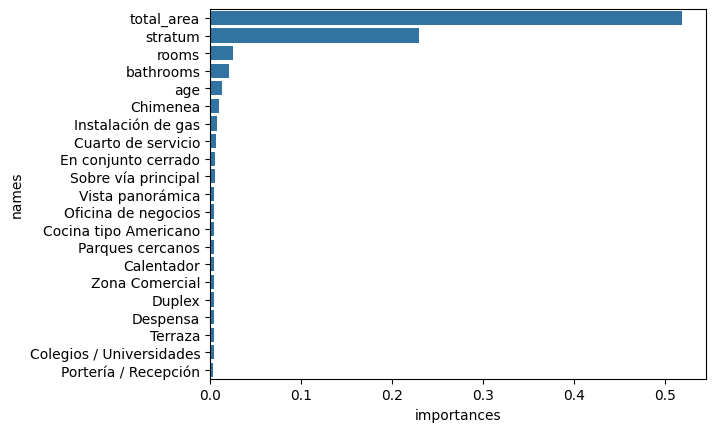

In [32]:
sns.barplot(df_importances.loc[0:20,:], x='importances', y='names')
plt.show()

In [33]:
most_important_features_20.append('fixed_price')

In [34]:
def remove_features_df(df, list_important=most_important_features_20 ):
    df_new = df.copy()
    df_new = df_new[list_important]
    return df_new

In [35]:
df_train_selected_features = remove_features_df(df_train)
df_valid_selected_features = remove_features_df(df_valid)
df_test_selected_features = remove_features_df(df_test)

#### OHE

In [36]:
def ohe_transform(df):
    new_df = df.copy()
    ohe_features = new_df['stratum']
    ohe_features = pd.get_dummies(ohe_features, drop_first=True, dtype=int)
    ohe_features.columns = ['2','3', '4', '5', '6']
    new_df = new_df.drop('stratum', axis=1)
    new_df = pd.concat([new_df, ohe_features], axis=1)
    return new_df

In [37]:
def ohe_transform_valid(df):
    new_df = df.copy()
    ohe_features = new_df['stratum']
    ohe_features = pd.get_dummies(ohe_features, drop_first=True, dtype=int)
    ohe_features.columns = ['3', '4', '5', '6']
    new_df = new_df.drop('stratum', axis=1)
    new_df['2'] = np.full(len(new_df), 0)
    new_df = pd.concat([new_df, ohe_features], axis=1)
    return new_df

#### Caracteristicas nuevas

In [80]:
def create_new_features(df):
    f_df = df.copy()
    total_columns = list(f_df.columns)
    columns_to_delete = ['total_area','stratum', 'rooms', 'bathrooms','age', 'fixed_price']
    total_amenities = [i for i in total_columns if i not in columns_to_delete]    
    f_df['total_amenities'] = f_df[total_amenities].sum(axis=1)
    f_df['area_per_room'] = f_df['total_area'] / f_df['rooms']
    f_df['area_per_bathroom'] = f_df['total_area'] / f_df['bathrooms']
    f_df['area_per_stratum'] = f_df['total_area'] / f_df['stratum']
    f_df['stratum per_rooms'] = f_df['stratum'] / f_df['rooms']
    f_df['age_inverted'] = 1/ ( f_df['age'] +1)
    
    
    return f_df

In [87]:
df_train_new_features = create_new_features(df_train)
df_valid_new_features = create_new_features(df_valid)
df_test_new_features = create_new_features(df_test)
list_new_features = ['total_area','stratum', 'rooms', 'bathrooms','age', 'fixed_price','area_per_room','area_per_bathroom','area_per_stratum','stratum per_rooms','age_inverted','total_amenities' ]
df_train_new_features_removed = remove_features_df(df_train_new_features, list_new_features)
df_valid_new_features_removed = remove_features_df(df_valid_new_features, list_new_features)
df_test_new_features_removed = remove_features_df(df_test_new_features, list_new_features)

## Modelos

#### Funciones

In [41]:
def metrics_eval(target, predictions, dataset_name):
    rmse = root_mean_squared_error(target, predictions)
    mae = mean_absolute_error(target, predictions)
    print(f'Dataset de {dataset_name}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')

In [42]:
def graph_predictions_each_data(target, predictions):
    plt.figure(figsize=(15,6))
    arary_length = np.arange(len(target))
    plt.scatter(arary_length, predictions, marker='*', label='Predictions', s=20, alpha=0.8)
    plt.scatter(arary_length, target, label='Real values', s=20, alpha=0.8)
    plt.title('Price of the observation')
    plt.xlabel('Data number')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [43]:
def graph_predictions(target, predictions, ax, title):
    ax.scatter(target, predictions, s=20, alpha=0.8)
    ax.plot([target.min(), target.max()], [target.min(), target.max()], 'r--')
    ax.set_title(title)
    ax.set_xlabel('Valor real')
    ax.set_ylabel('Predicción')
    ax.legend(['Predicciones', 'Línea ideal'])

In [44]:
def model_evaluation(model, df_train, df_valid, model_name):

    f_train, t_train = features_target_split(df_train)
    f_valid, t_valid = features_target_split(df_valid)

    model.fit(f_train, t_train)
    predictions_t = model.predict(f_train)
    predictions_v = model.predict(f_valid)

    print(f"📊 Evaluación del modelo: {model_name}")
    metrics_eval(t_train, predictions_t, 'Entrenamiento')
    metrics_eval(t_valid, predictions_v, 'Validación')

    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    graph_predictions(t_train, predictions_t, axs[0], 'Entrenamiento')
    graph_predictions(t_valid, predictions_v, axs[1], 'Validación')

    fig.suptitle(f'Comparación de Predicciones - {model_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

### Regresión lineal

📊 Evaluación del modelo: Regresión Lineal
Dataset de Entrenamiento
RMSE: 197.46
MAE: 141.09
Dataset de Validación
RMSE: 244.91
MAE: 182.15


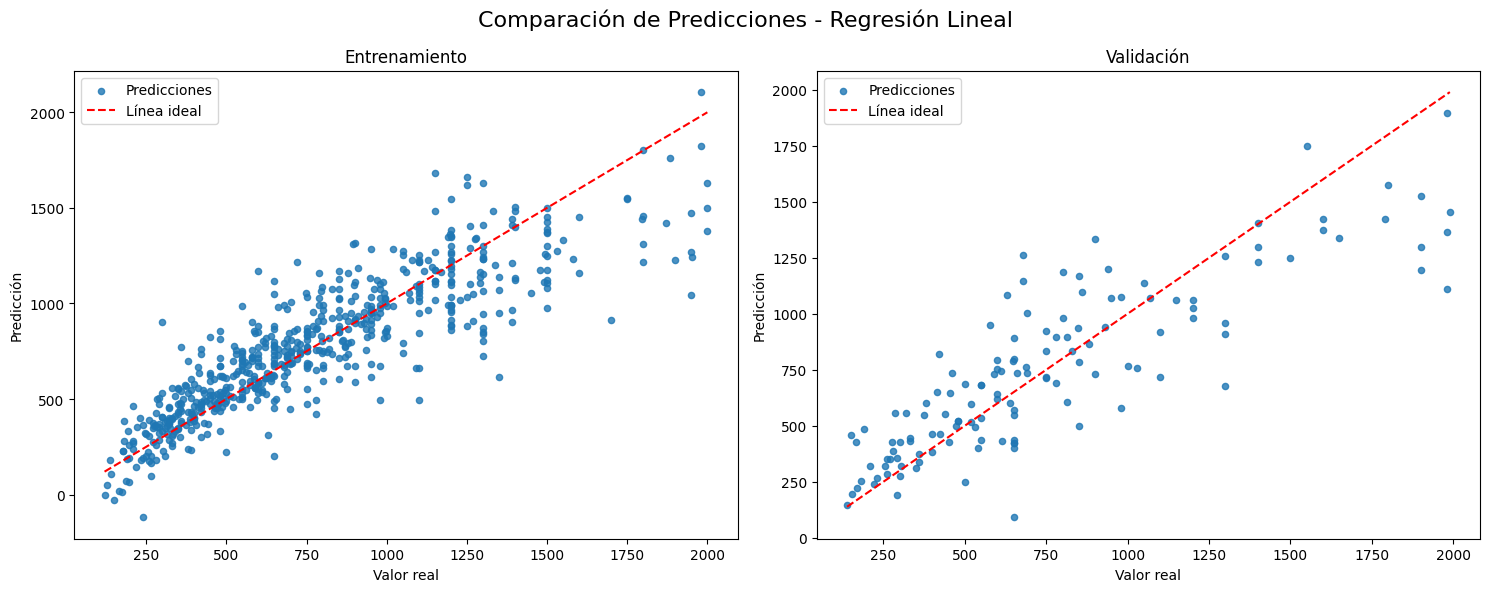

In [45]:
model_linear = LinearRegression()
model_evaluation(model_linear, df_train, df_valid, 'Regresión Lineal')

📊 Evaluación del modelo: Regresión Lineal - Aislado
Dataset de Entrenamiento
RMSE: 185.07
MAE: 130.10
Dataset de Validación
RMSE: 244.92
MAE: 182.65


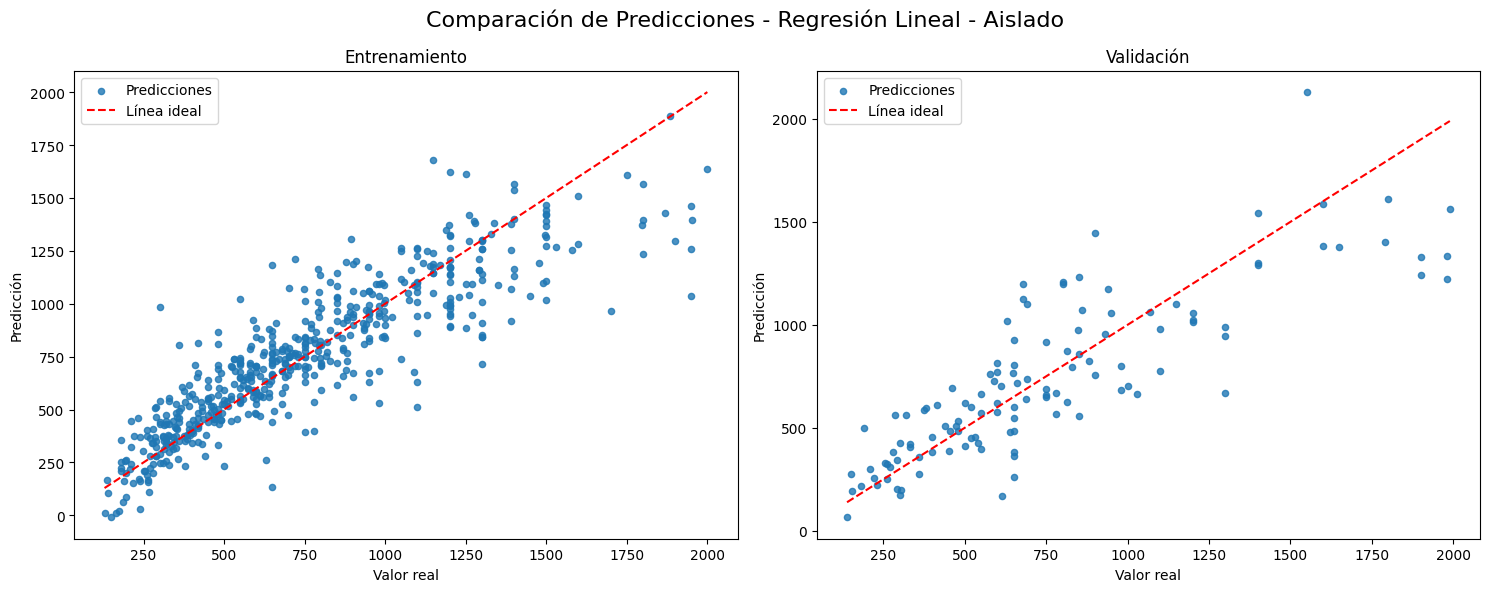

In [46]:
model_evaluation(model_linear, df_train_isolation, df_valid_isolation, 'Regresión Lineal - Aislado')

📊 Evaluación del modelo: Regresión Lineal - DF escalado
Dataset de Entrenamiento
RMSE: 197.46
MAE: 141.09
Dataset de Validación
RMSE: 244.91
MAE: 182.15


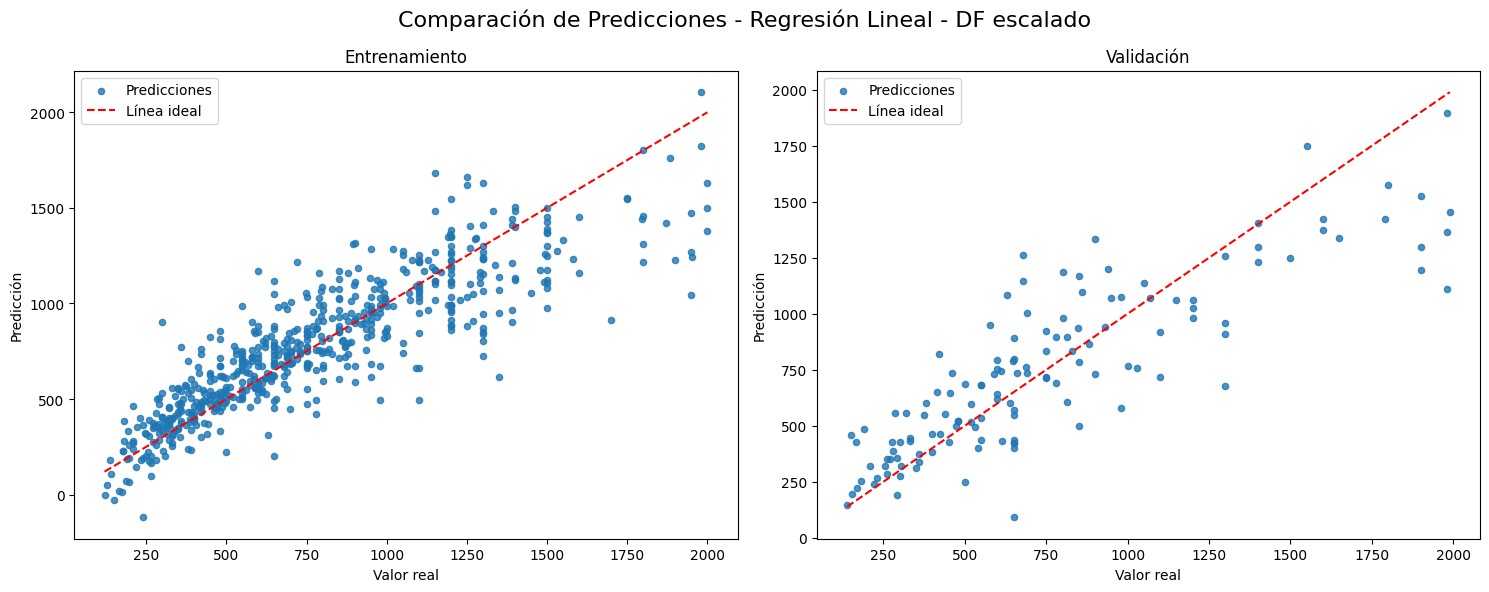

In [47]:
model_evaluation(model_linear, df_train_scaled, df_valid_scaled, 'Regresión Lineal - DF escalado')

📊 Evaluación del modelo: Linear model - Selected features
Dataset de Entrenamiento
RMSE: 222.50
MAE: 159.21
Dataset de Validación
RMSE: 210.38
MAE: 152.20


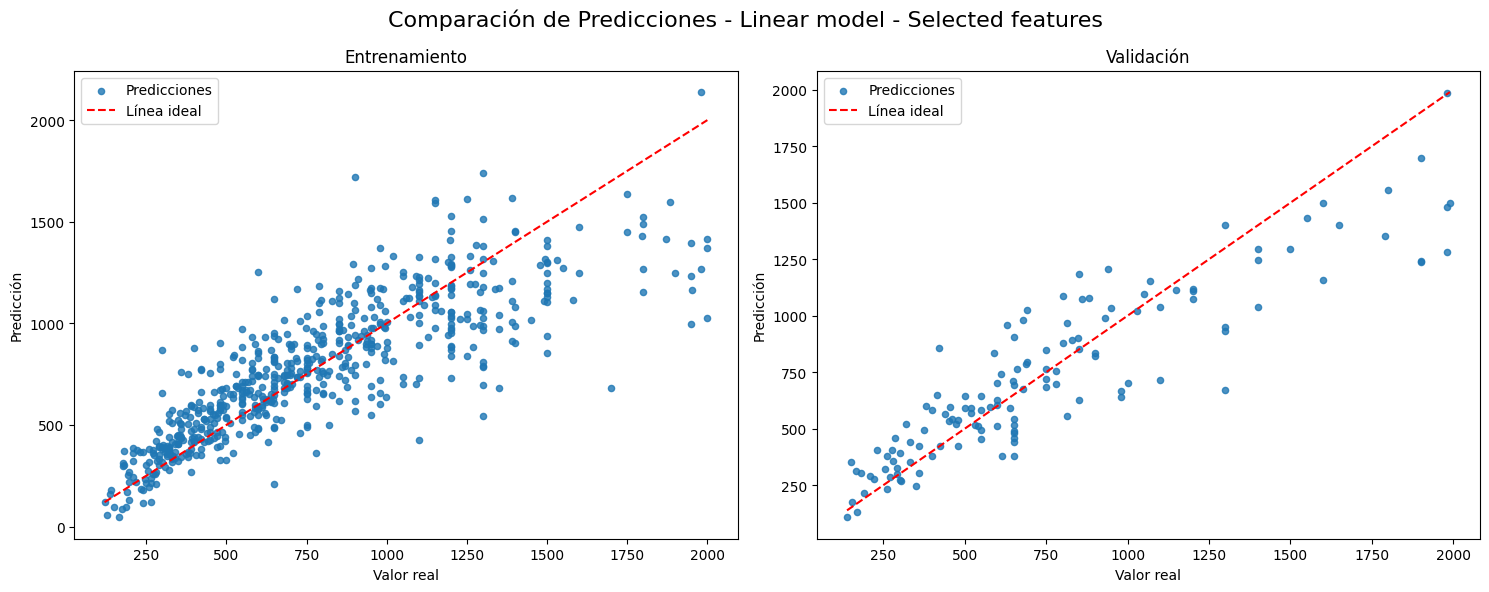

In [48]:
model_evaluation(model_linear, df_train_selected_features, df_valid_selected_features, 'Linear model - Selected features')

📊 Evaluación del modelo: Regresión Lineal - Nuevas caracteristicas
Dataset de Entrenamiento
RMSE: 191.70
MAE: 139.45
Dataset de Validación
RMSE: 245.29
MAE: 180.00


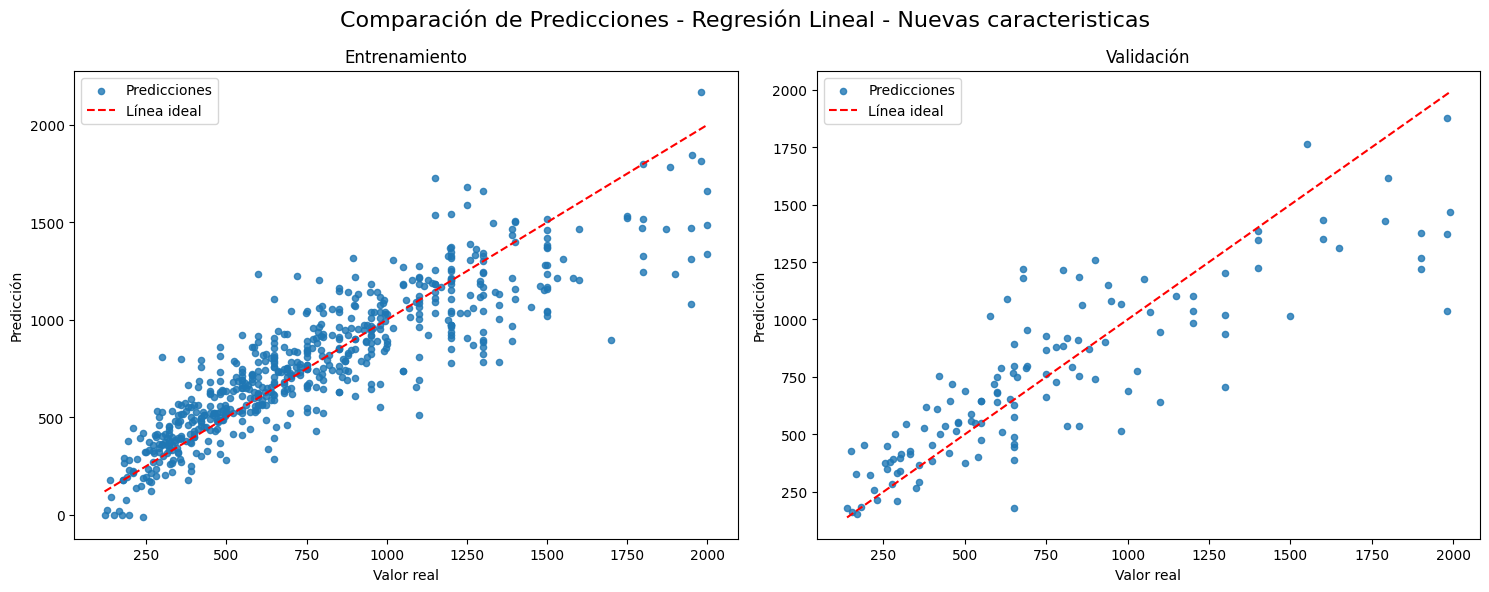

In [50]:
model_evaluation(model_linear, df_train_new_features, df_valid_new_features, 'Regresión Lineal - Nuevas caracteristicas')

📊 Evaluación del modelo: Regresión Lineal - Nuevas caracteristicas
Dataset de Entrenamiento
RMSE: 223.81
MAE: 160.11
Dataset de Validación
RMSE: 216.30
MAE: 152.45


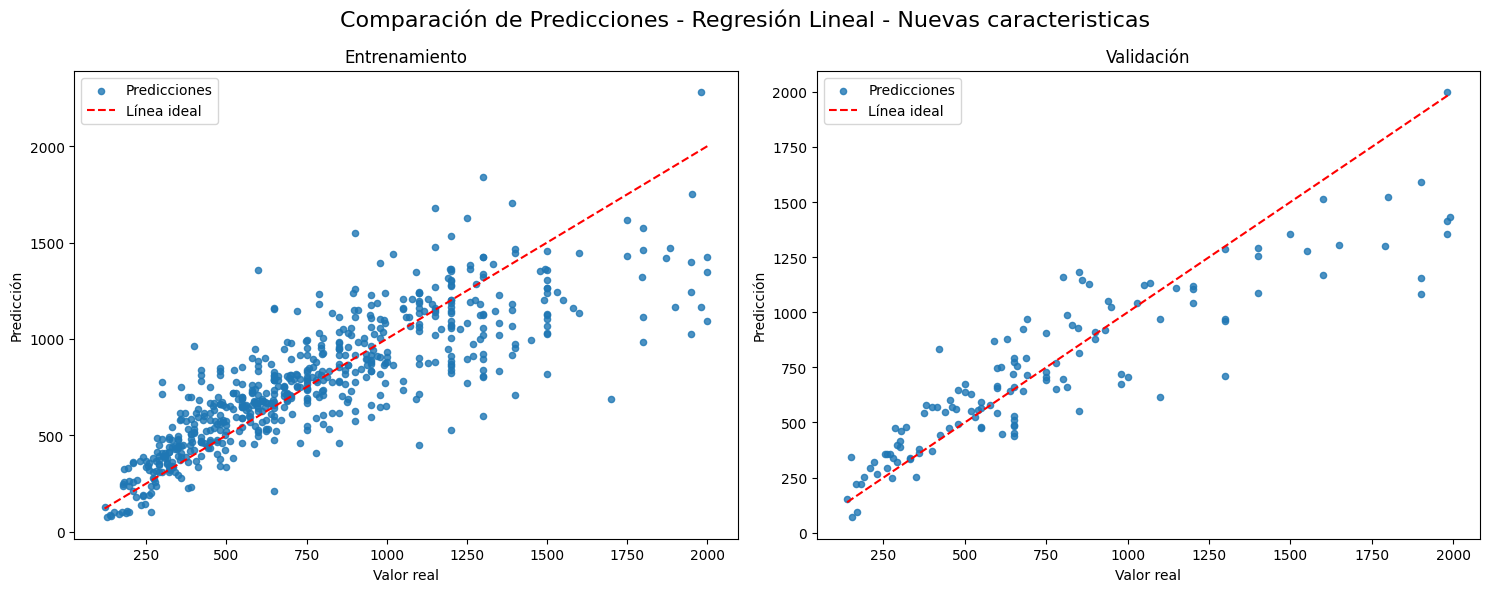

In [83]:
model_evaluation(model_linear, df_train_new_features_removed, df_valid_new_features_removed, 'Regresión Lineal - Nuevas caracteristicas')

### Random Forest

In [51]:
model_forest = RandomForestRegressor(n_estimators=50,
                                     max_depth=20,
                                     max_features=0.9,
                                     min_samples_split=10,
                                     random_state=ran)

📊 Evaluación del modelo: Random Forest
Dataset de Entrenamiento
RMSE: 135.57
MAE: 96.16
Dataset de Validación
RMSE: 246.79
MAE: 168.54


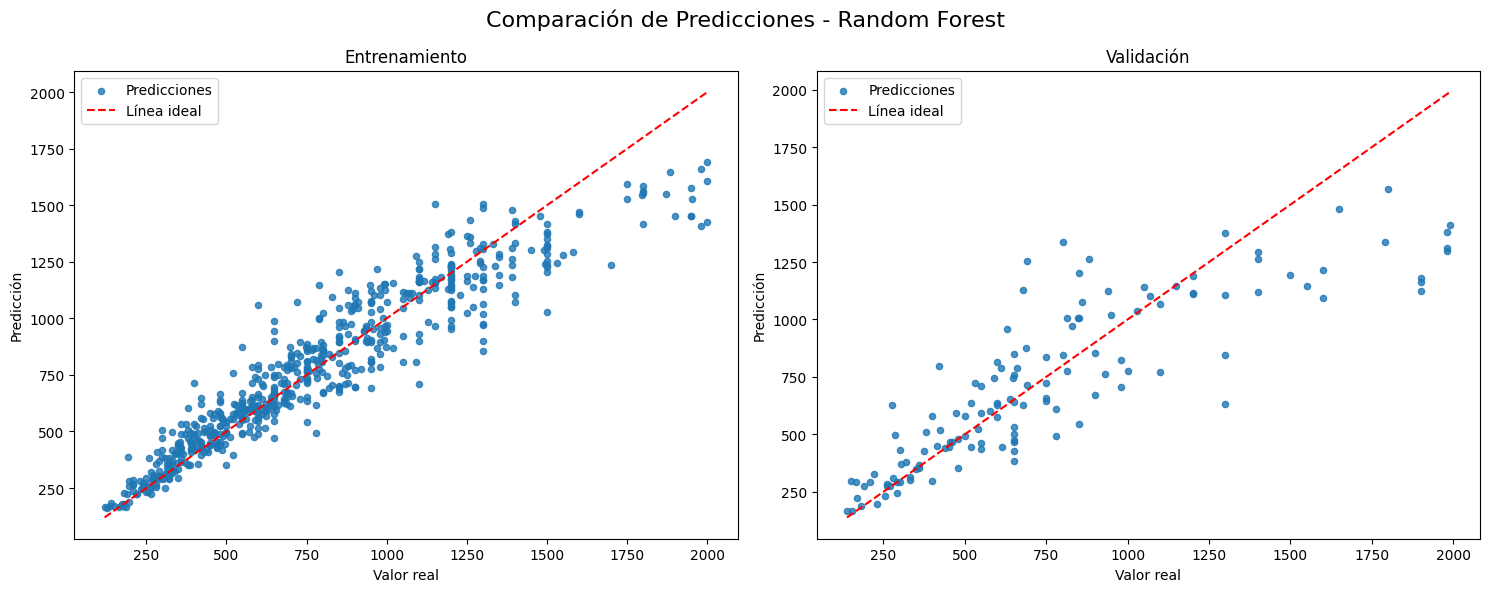

In [52]:
model_evaluation(model_forest, df_train, df_valid, 'Random Forest')

📊 Evaluación del modelo: Random Forest - Isolation
Dataset de Entrenamiento
RMSE: 131.95
MAE: 92.35
Dataset de Validación
RMSE: 236.72
MAE: 163.77


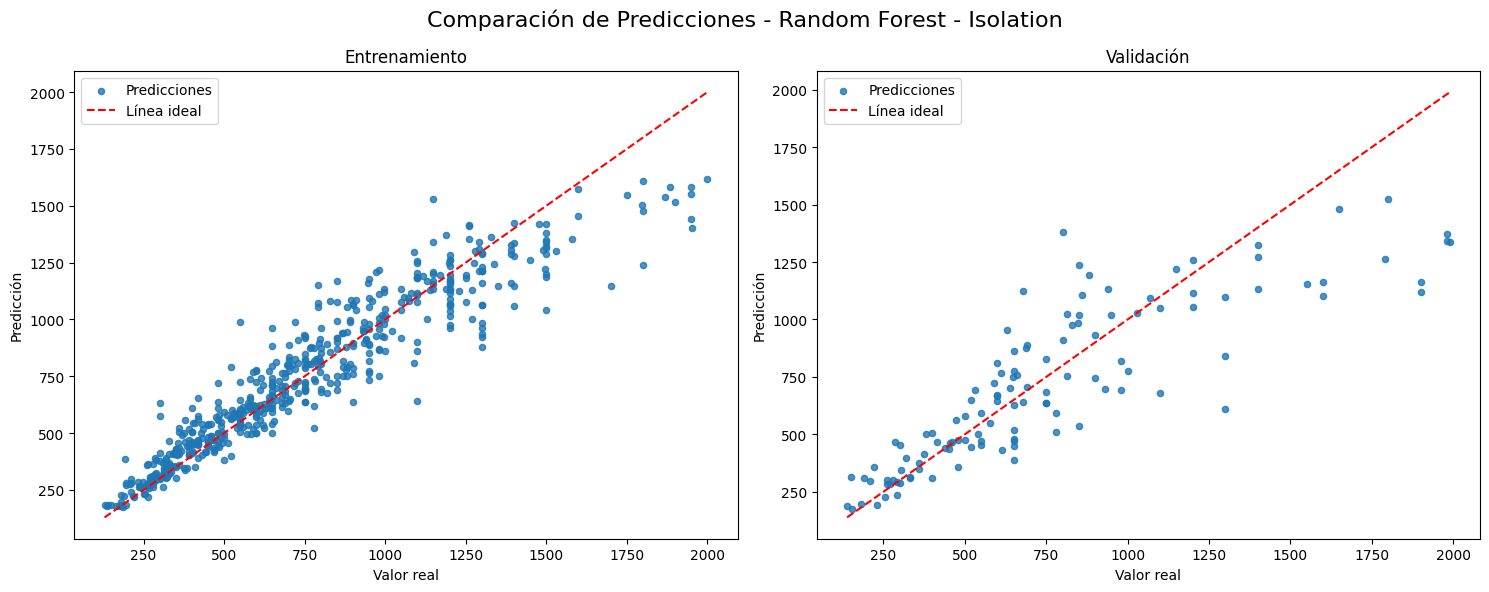

In [53]:
model_evaluation(model_forest, df_train_isolation, df_valid_isolation, 'Random Forest - Isolation')

📊 Evaluación del modelo: Random Forest - Escalado
Dataset de Entrenamiento
RMSE: 135.43
MAE: 96.05
Dataset de Validación
RMSE: 246.30
MAE: 168.11


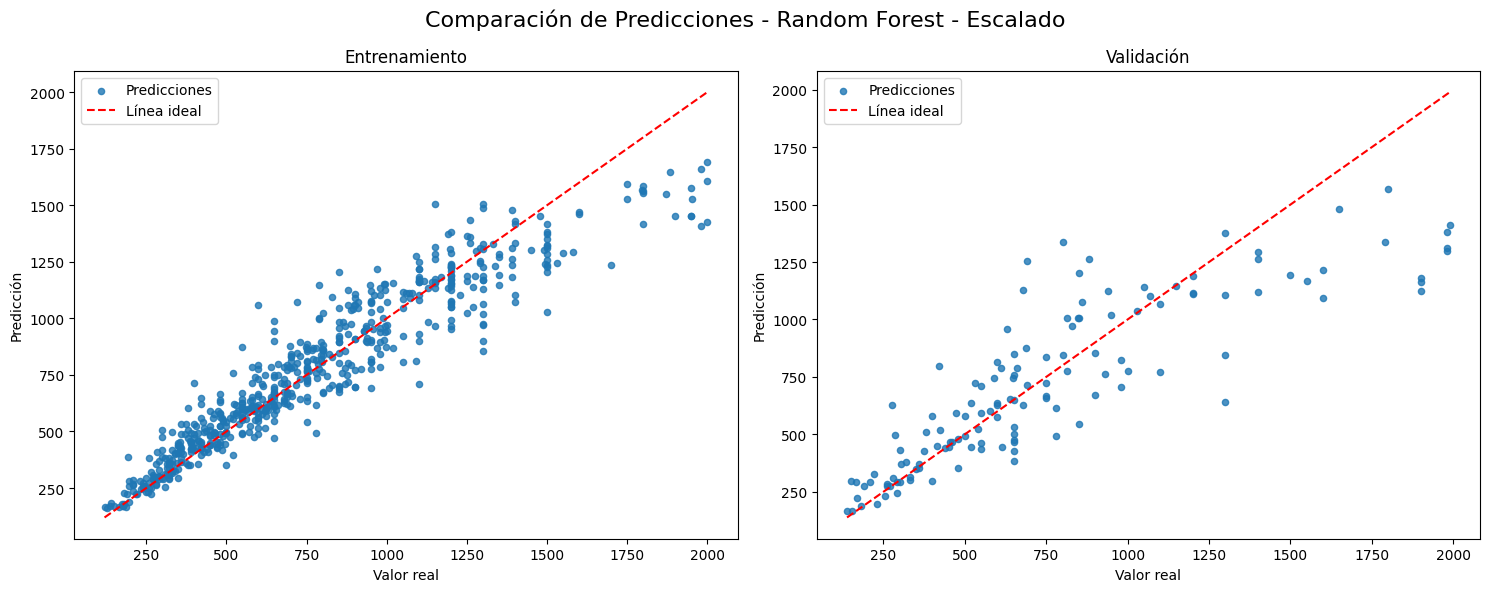

In [54]:
model_evaluation(model_forest, df_train_scaled, df_valid_scaled, 'Random Forest - Escalado')

📊 Evaluación del modelo: Random Forest - Selected features
Dataset de Entrenamiento
RMSE: 143.85
MAE: 104.26
Dataset de Validación
RMSE: 247.27
MAE: 169.92


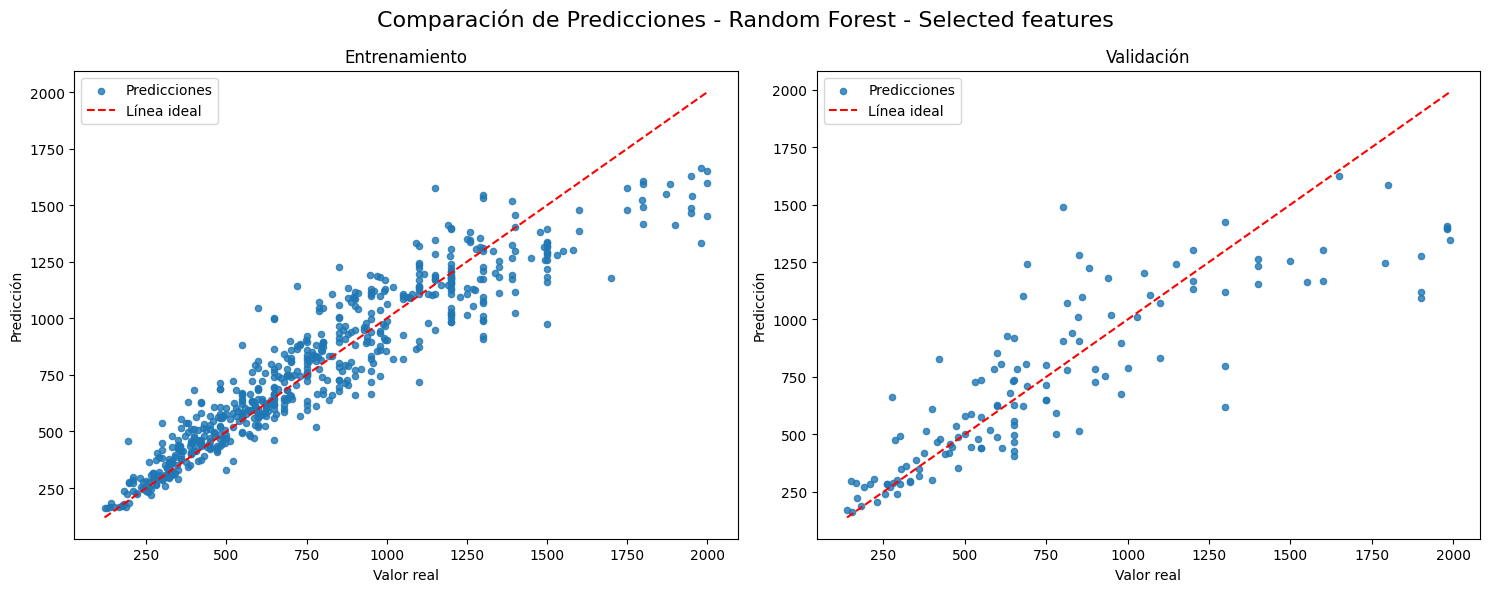

In [55]:
model_evaluation(model_forest, df_train_selected_features, df_valid_selected_features, 'Random Forest - Selected features')

📊 Evaluación del modelo: Random Forest - Nuevas caracteristicas
Dataset de Entrenamiento
RMSE: 129.99
MAE: 92.46
Dataset de Validación
RMSE: 248.51
MAE: 171.73


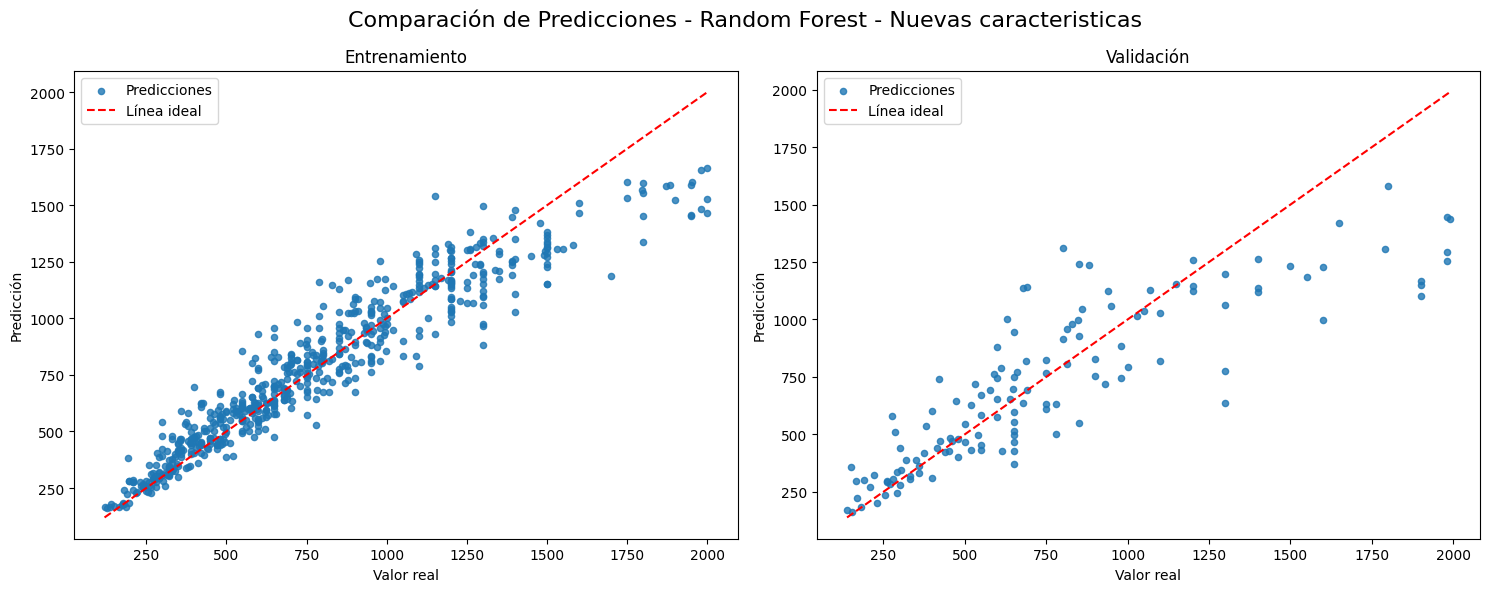

In [56]:
model_evaluation(model_forest, df_train_new_features, df_valid_new_features, 'Random Forest - Nuevas caracteristicas')

📊 Evaluación del modelo: Random Forest - Nuevas caracteristicas
Dataset de Entrenamiento
RMSE: 139.21
MAE: 99.44
Dataset de Validación
RMSE: 237.01
MAE: 165.59


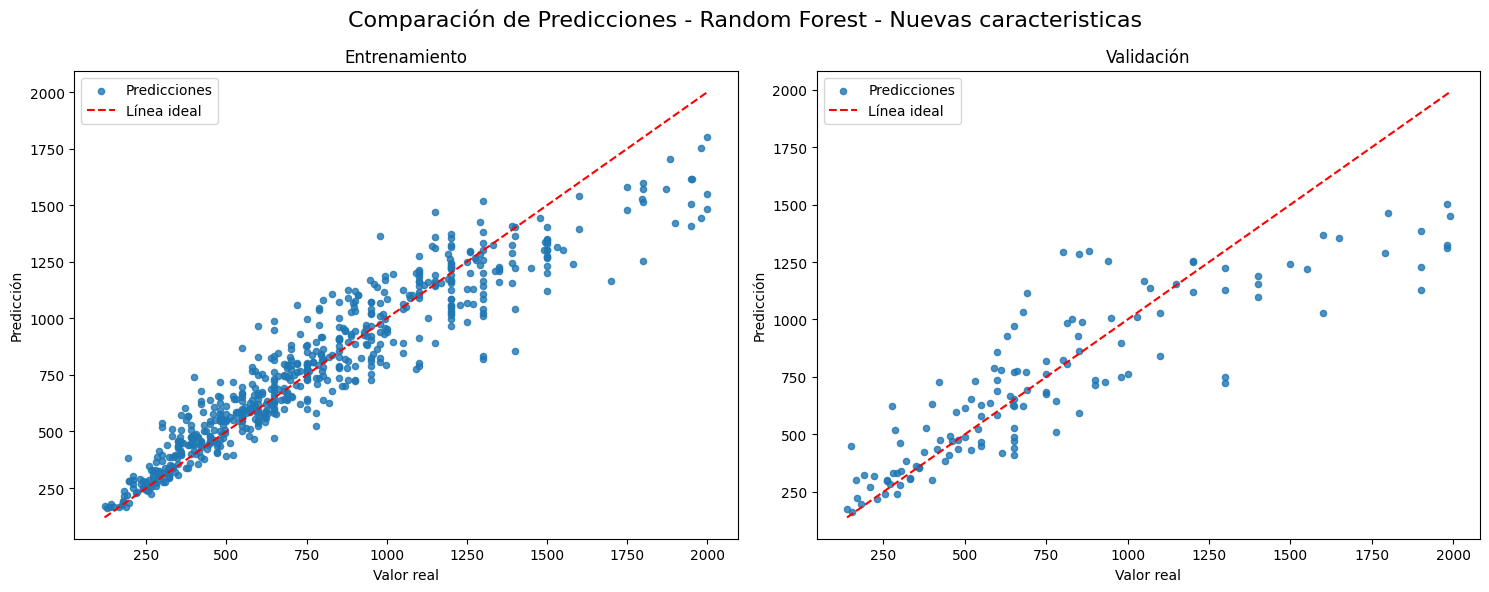

In [84]:
model_evaluation(model_forest, df_train_new_features_removed, df_valid_new_features_removed, 'Random Forest - Nuevas caracteristicas')

### XGBoost

In [57]:
model_xgb = xgb.XGBRegressor(eval_metric='rmse',
                            learning_rate = 0.04, 
                            max_depth=6, 
                            subsample=0.9,
                            colsample_bytree=0.9,
                            n_estimators=70,
                            alpha=0.2,
                            random_state=ran)

📊 Evaluación del modelo: XGBoost
Dataset de Entrenamiento
RMSE: 125.38
MAE: 92.13
Dataset de Validación
RMSE: 263.81
MAE: 181.49


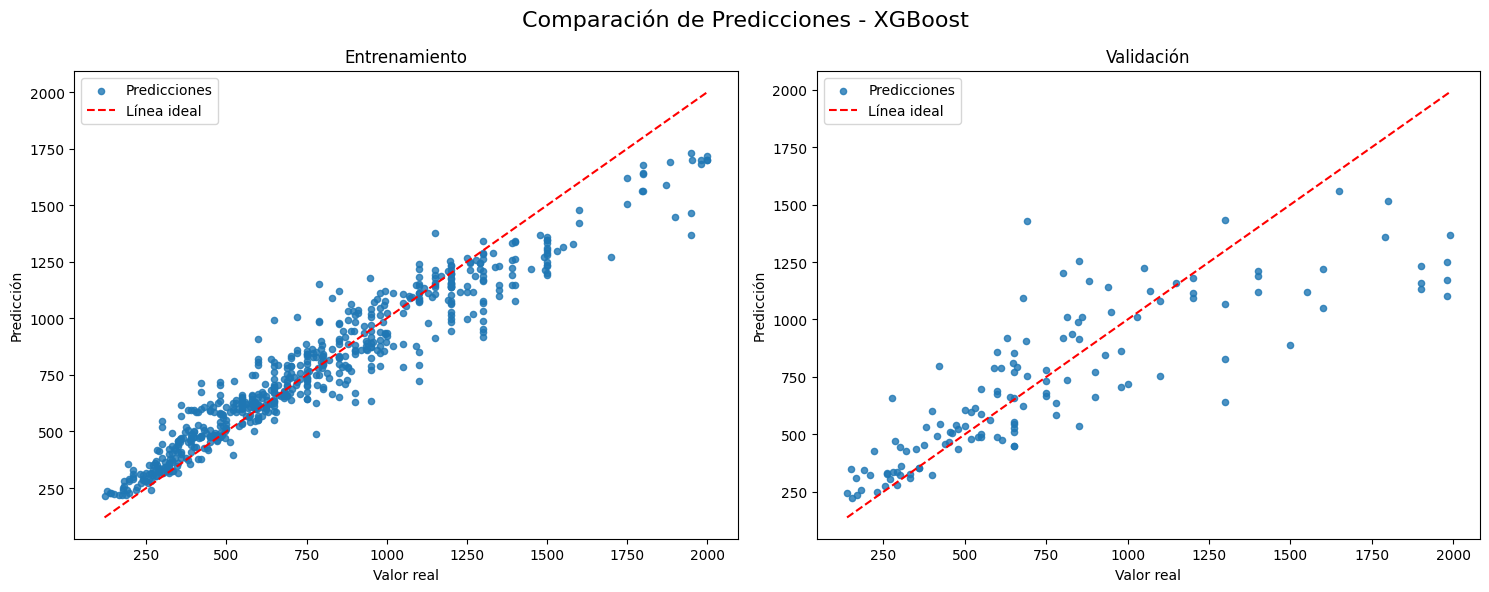

In [58]:
model_evaluation(model_xgb, df_train, df_valid, 'XGBoost')

📊 Evaluación del modelo: XGBoost - Forest Isolation
Dataset de Entrenamiento
RMSE: 115.85
MAE: 84.24
Dataset de Validación
RMSE: 243.24
MAE: 167.78


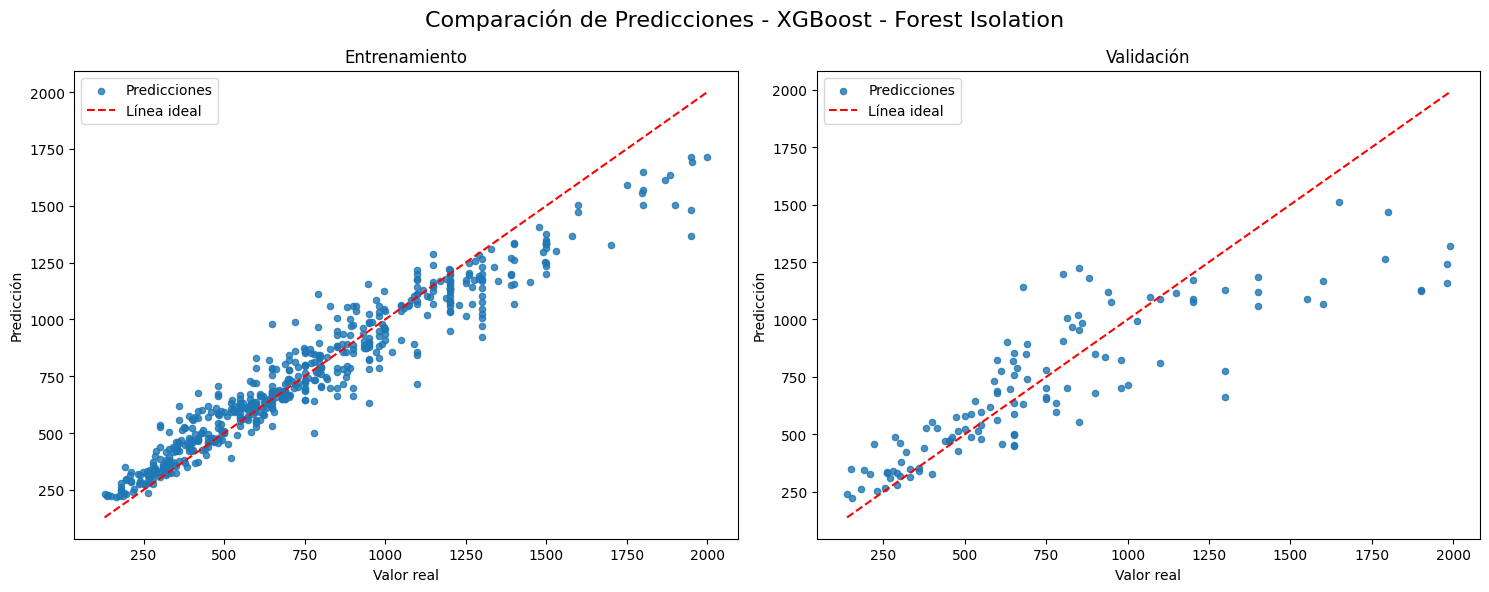

In [59]:
model_evaluation(model_xgb, df_train_isolation, df_valid_isolation, 'XGBoost - Forest Isolation')

📊 Evaluación del modelo: XG-Boost - DF escalado
Dataset de Entrenamiento
RMSE: 125.38
MAE: 92.13
Dataset de Validación
RMSE: 263.81
MAE: 181.49


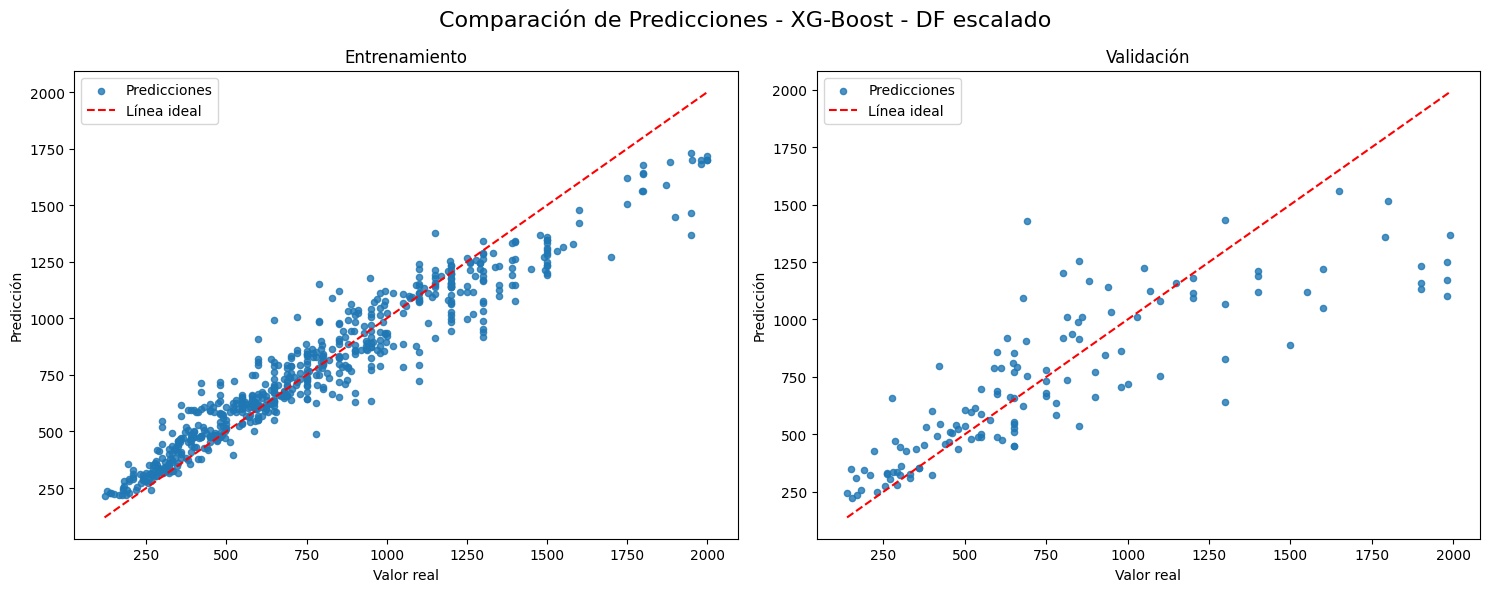

In [60]:
model_evaluation(model_xgb, df_train_scaled, df_valid_scaled, 'XG-Boost - DF escalado')

📊 Evaluación del modelo: XG-Boost - Cluster
Dataset de Entrenamiento
RMSE: 118.08
MAE: 86.69
Dataset de Validación
RMSE: 229.19
MAE: 161.19


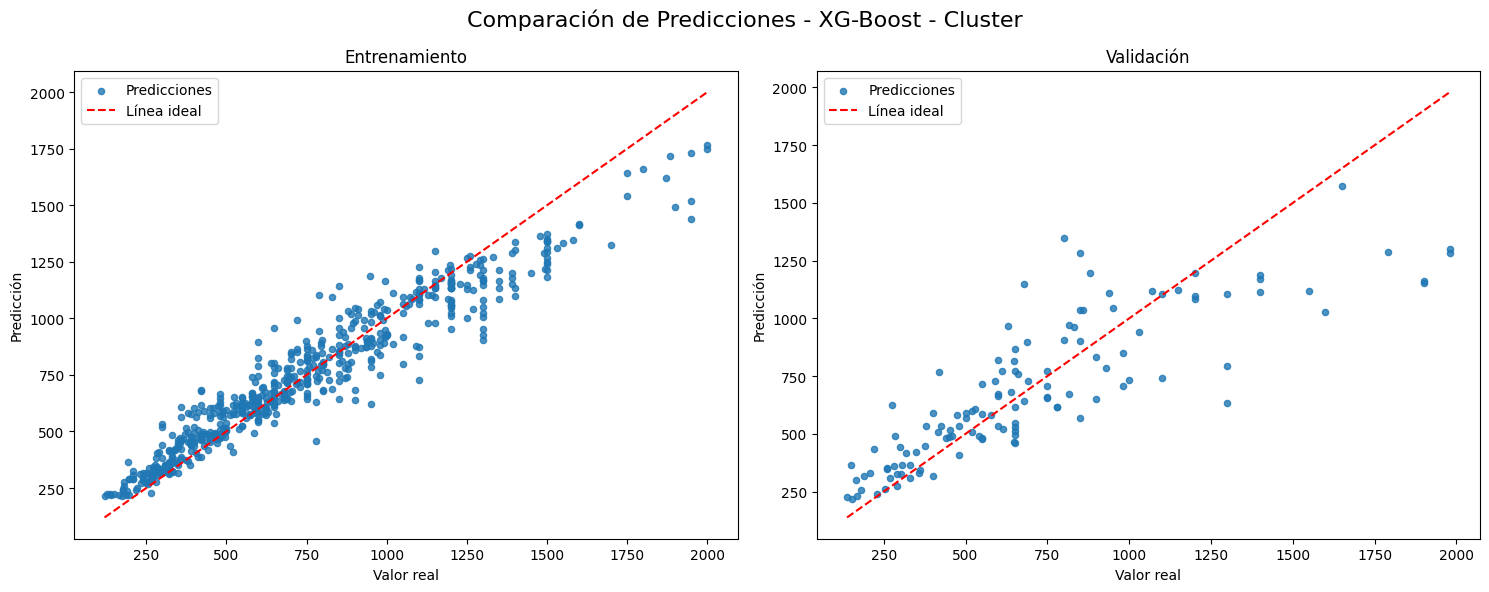

In [61]:
model_evaluation(model_xgb, df_train_cluster, df_valid_cluster, 'XG-Boost - Cluster')

📊 Evaluación del modelo: XG-Boost - Selected features
Dataset de Entrenamiento
RMSE: 133.26
MAE: 98.25
Dataset de Validación
RMSE: 257.77
MAE: 182.17


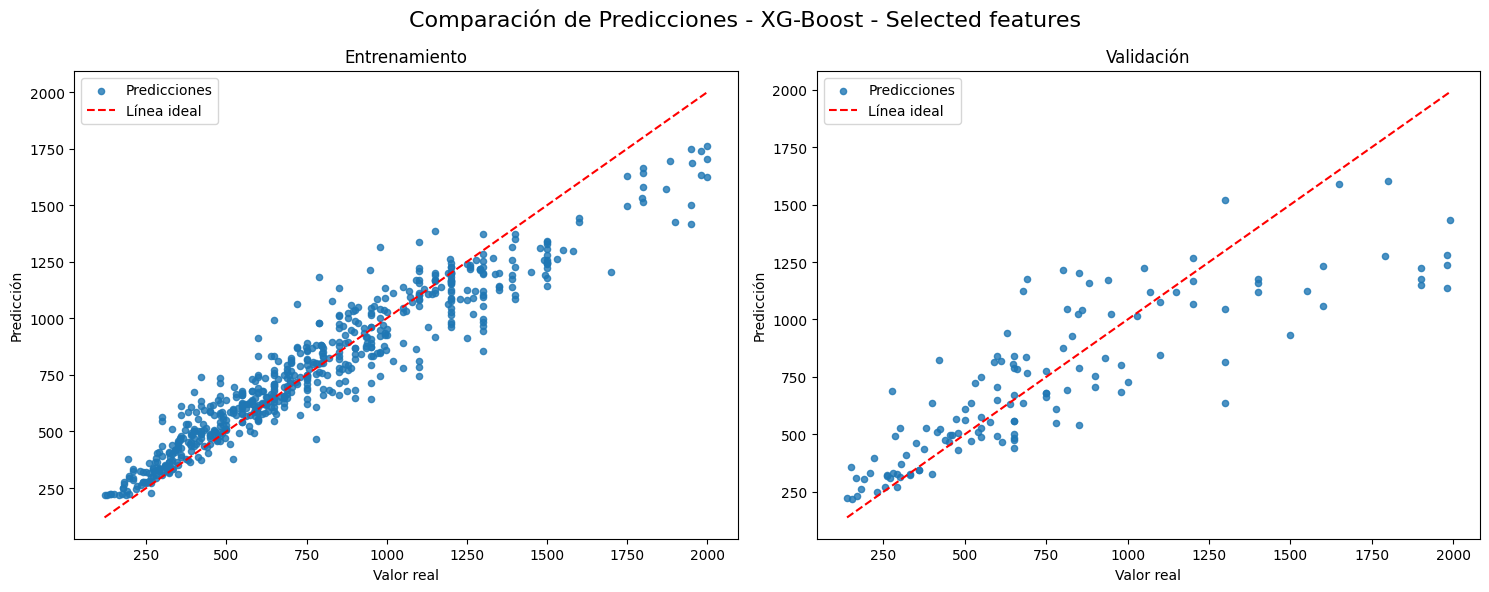

In [62]:
model_evaluation(model_xgb, df_train_selected_features, df_valid_selected_features, 'XG-Boost - Selected features')

📊 Evaluación del modelo: XGBoost - Nuevas caracteristicas
Dataset de Entrenamiento
RMSE: 112.33
MAE: 82.24
Dataset de Validación
RMSE: 258.63
MAE: 179.62


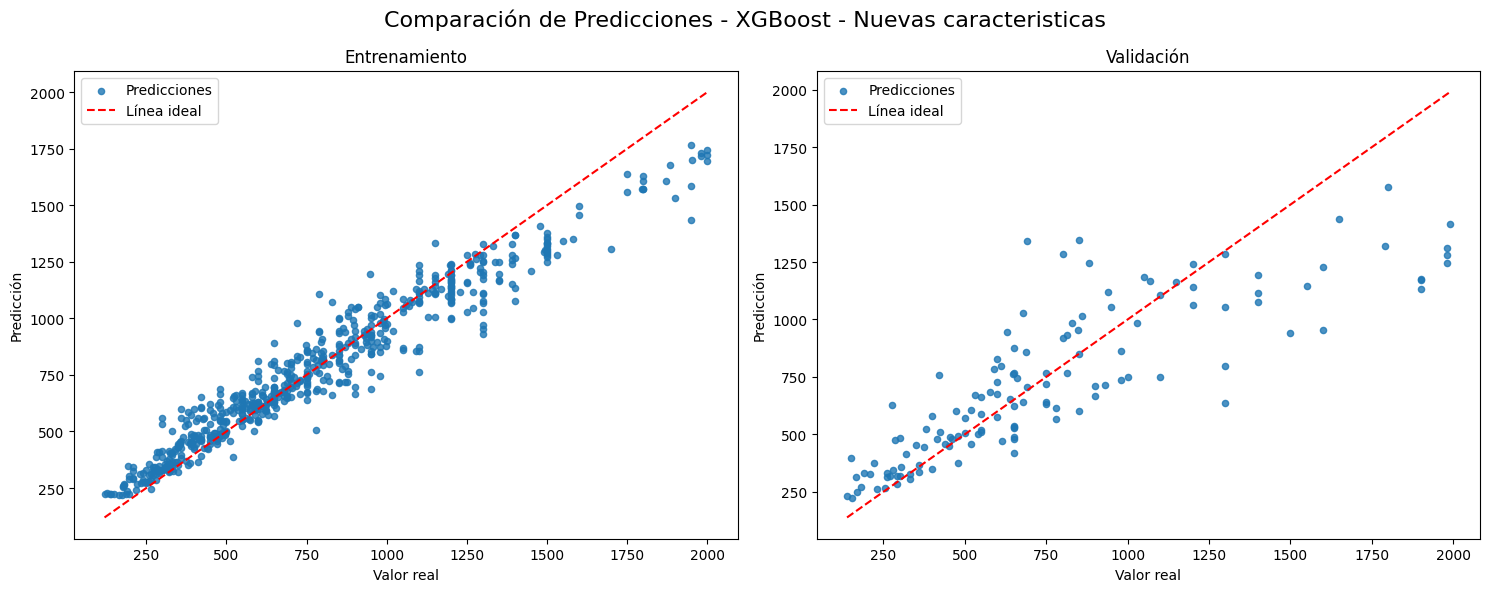

In [64]:
model_evaluation(model_xgb, df_train_new_features, df_valid_new_features, 'XGBoost - Nuevas caracteristicas')

📊 Evaluación del modelo: XGBoost - Nuevas caracteristicas
Dataset de Entrenamiento
RMSE: 125.59
MAE: 90.28
Dataset de Validación
RMSE: 258.11
MAE: 180.64


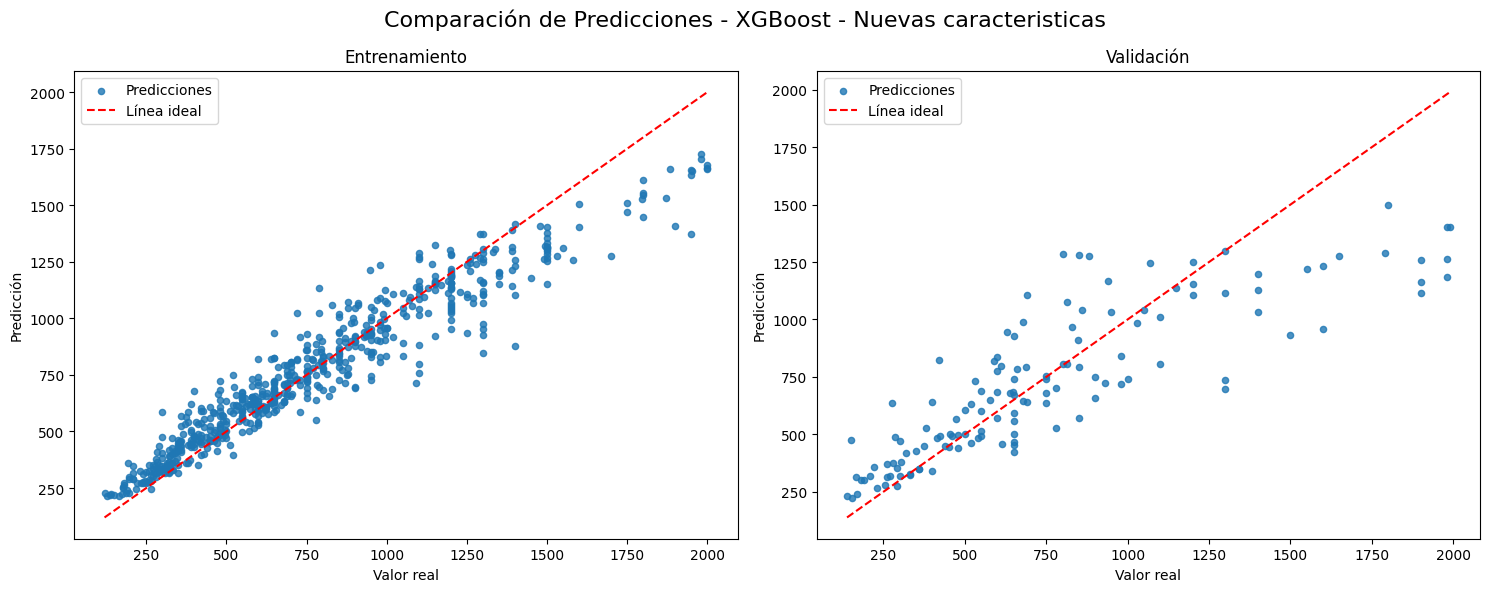

In [85]:
model_evaluation(model_xgb, df_train_new_features_removed, df_valid_new_features_removed, 'XGBoost - Nuevas caracteristicas')

## Optimizacion

In [168]:
df_opt = pd.concat([df_train_new_features_removed, df_valid_new_features_removed], axis=0)
f_opt_nf, t_opt_nf = features_target_split(df_opt)

In [ ]:
model_xgb_selected = xgb.XGBRegressor(eval_metric='rmse',
                            random_state=ran)
params = {
    'learning_rate'     : [0.01, 0.04, 0.08], 
    'max_depth'         : [3, 6, 12], 
    'subsample'         : [0.5, 0.9],
    'colsample_bytree'  : [0.5, 0.9],
    'n_estimators'      : [50, 70, 100],
    'alpha'             : [0.2, 1],
}
grid_search = GridSearchCV(estimator=model_xgb_selected,
                           param_grid=params,
                           verbose=3,
                           scoring= 'neg_mean_absolute_error', 
                           cv=3,)

In [170]:
grid_search.fit(f_opt_nf, t_opt_nf )

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3] END alpha=0.2, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.5;, score=-271.091 total time=   0.0s
[CV 2/3] END alpha=0.2, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.5;, score=-245.712 total time=   0.0s
[CV 3/3] END alpha=0.2, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.5;, score=-267.106 total time=   0.0s
[CV 1/3] END alpha=0.2, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=-269.845 total time=   0.0s
[CV 2/3] END alpha=0.2, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=-244.199 total time=   0.0s
[CV 3/3] END alpha=0.2, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=-266.036 total time=   0.0s
[CV 1/3] END alpha=0.2, colsample_bytree=0.5, learning_rate=0

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    feature_weights=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=No...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'alpha': [0.2, 1], 'colsample_bytree': [0.5, 0.9],
                         'learning_rate': [0.01, 0.04, 0.08],
                         'max_depth': [3, 6, 12], 'n_estimators': [50, 70, 100],
                         'subsample': [0.5, 0.9]},
             scoring='neg_mean_absolute_error', verbose=3)

In [173]:
best_xgb = grid_search.best_estimator_

In [174]:
grid_search.best_params_

{'alpha': 1,
 'colsample_bytree': 0.5,
 'learning_rate': 0.08,
 'max_depth': 3,
 'n_estimators': 70,
 'subsample': 0.5}

📊 Evaluación del modelo: XGBoost - Nuevas caracteristicas
Dataset de Entrenamiento
RMSE: 183.82
MAE: 132.71
Dataset de Validación
RMSE: 230.80
MAE: 159.36


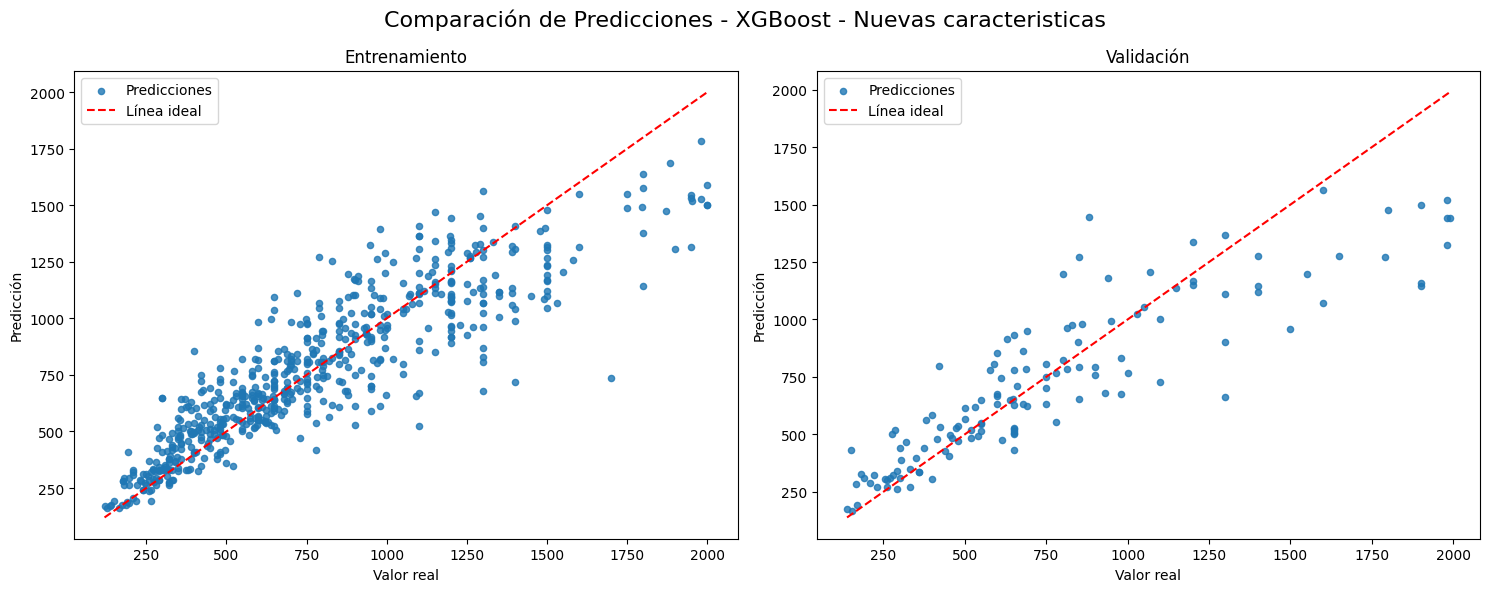

In [175]:
model_evaluation(best_xgb, df_train_new_features_removed, df_valid_new_features_removed, 'XGBoost - Nuevas caracteristicas')

## Prueba con datos de test

📊 Evaluación del modelo: XGBoost - Nuevas caracteristicas
Dataset de Entrenamiento
RMSE: 183.82
MAE: 132.71
Dataset de Validación
RMSE: 200.98
MAE: 153.13


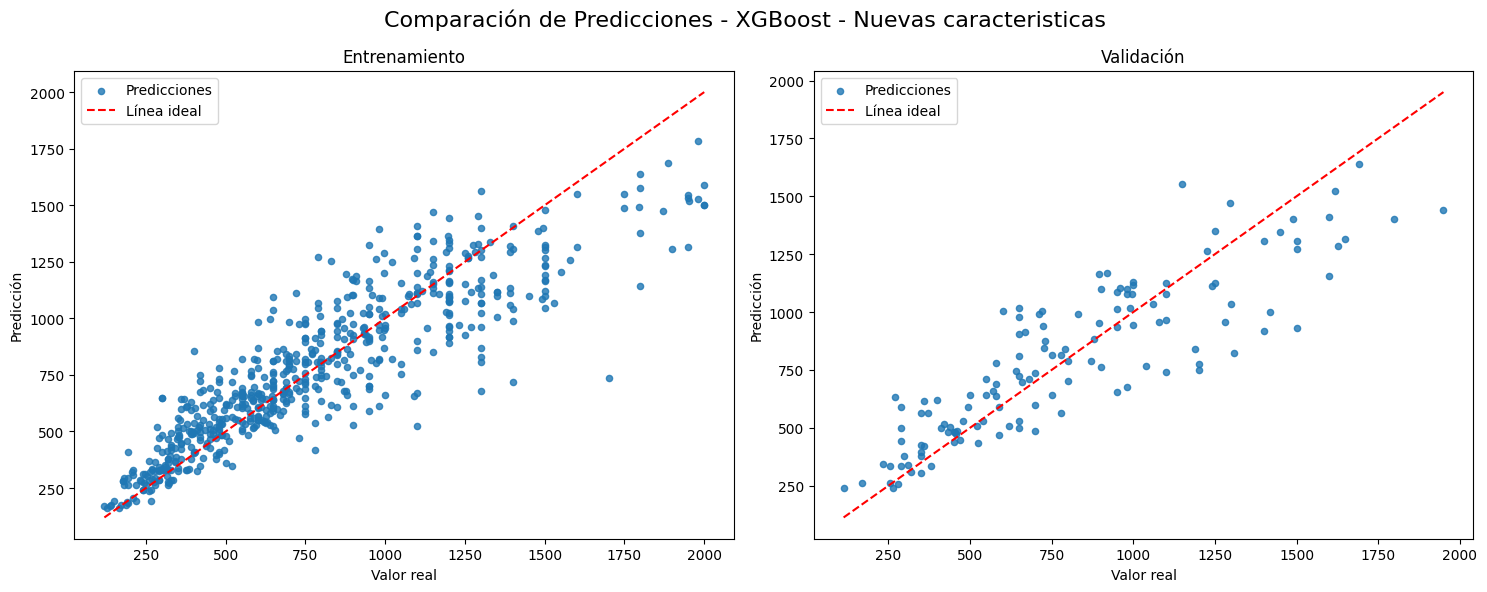

In [176]:
model_evaluation(best_xgb, df_train_new_features_removed, df_test_new_features_removed, 'XGBoost - Nuevas caracteristicas')

In [181]:
sample = df_test_new_features_removed.sample(5, random_state=312)
f_test, t_test = features_target_split(sample)
predictions_test = best_xgb.predict(f_test)

data_prediction_sample = {
    'real': sample['fixed_price'],
    'prediction': predictions_test,
    'residual': predictions_test - sample['fixed_price']
}
answer = pd.DataFrame(data_prediction_sample)
answer

real   prediction    residual
600  950.0  1012.502930   62.502930
969  350.0   304.980835  -45.019165
674  113.0   238.724014  125.724014
885  998.0  1129.506226  131.506226
73   650.0   903.653381  253.653381